In [1]:
# Made using https://luv-bansal.medium.com/fine-tuning-bert-for-text-classification-in-pytorch-503d97342db2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [3]:
data_path = '../data/us-patent-phrase-to-phrase-matching/'
train_file = 'train.csv'
test_file = 'test.csv'

df_train = pd.read_csv(data_path + train_file)
df_train.head(2)

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75


In [4]:
df_test = pd.read_csv(data_path + test_file)
df_test.head(2)

,id,anchor,target,context
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02
1,09e418c93a776564,adjust gas flow,altering gas flow,F23


In [5]:
cpc_codes = pd.read_csv('../data/cooperative-patent-classification-codes-meaning/titles.csv').rename(columns={"code" : "context"})
cpc_codes.head(2)

,context,title,section,class,subclass,group,main_group
0,A,HUMAN NECESSITIES,A,NaN,NaN,NaN,NaN
1,A01,AGRICULTURE; FORESTRY; ANIMAL HUSBANDRY; HUNTI...,A,1.0,NaN,NaN,NaN


In [6]:
cpc_codes = cpc_codes.rename(columns = {"code" : "context"})
df_train = pd.merge(df_train, cpc_codes[["context","title"]], on ="context", how = "left")
df_test = pd.merge(df_test, cpc_codes[["context","title"]], on ="context", how = "left")
df_train.head(2)

,id,anchor,target,context,score,title
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,FURNITURE; DOMESTIC ARTICLES OR APPLIANCES; CO...
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,FURNITURE; DOMESTIC ARTICLES OR APPLIANCES; CO...


## Exploration

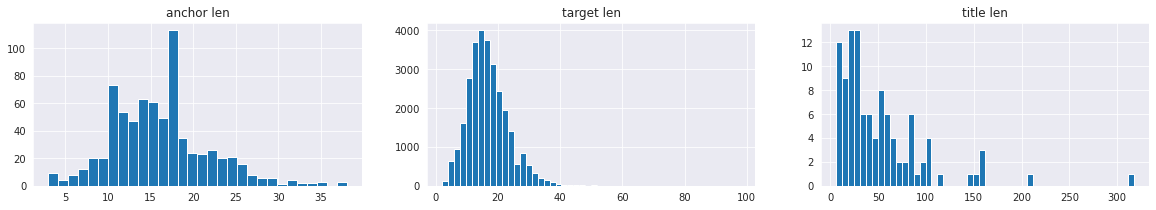

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(20, 3))

pd.Series(df_train.anchor.unique()).str.len().hist(ax=axs[0], bins=30)
axs[0].set_title('anchor len')
pd.Series(df_train.target.unique()).str.len().hist(ax=axs[1], bins=50)
axs[1].set_title('target len')
pd.Series(df_train.title.unique()).str.len().hist(ax=axs[2], bins=50)
axs[2].set_title('title len')
plt.show()

In [ ]:
df_train['anchor_target_len'] = df_train.anchor.str.len() + df_train.target.str.len()

<AxesSubplot:xlabel='score', ylabel='anchor_target_len'>

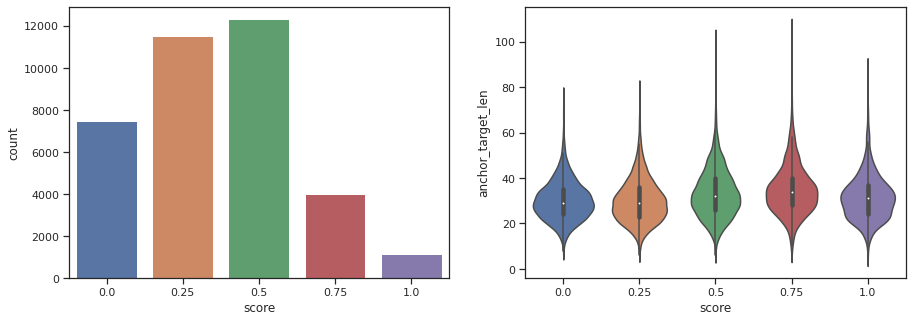

In [26]:
sns.set_theme(style='ticks')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='score', data=df_train, ax=axs[0])
sns.violinplot(x='score', y='anchor_target_len', data=df_train, ax=axs[1])